# Limpieza de Datos y Análisis Exploratorio de Datos

#### **Librerías**

Importamos las librerías necesarias.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale
import calendar


#### **Lectura del dataset**

Leemos los datos.

In [6]:
df = pd.read_csv('delitos_2020.csv', sep=',')

Mostramos las cinco primeras filas del dataframe.

In [7]:
df.head()

,id-mapa,anio,mes,dia,fecha,franja,tipo,subtipo,uso_arma,uso_moto,barrio,comuna,latitud,longitud,cantidad
0,192085,2020,JUNIO,MIERCOLES,2020-06-10,20.0,Hurto,Hurto total,NO,NO,NaN,NaN,NaN,NaN,1
1,192086,2020,AGOSTO,VIERNES,2020-08-21,11.0,Hurto,Hurto total,NO,NO,PARQUE AVELLANEDA,9.0,-34.641905,-58.487037,1
2,192087,2020,SEPTIEMBRE,MARTES,2020-09-15,20.0,Hurto,Hurto total,NO,NO,PARQUE AVELLANEDA,9.0,-34.641899,-58.480738,1
3,192088,2020,SEPTIEMBRE,MARTES,2020-09-22,10.0,Robo,Robo total,SI,NO,PARQUE AVELLANEDA,9.0,-34.641043,-58.484628,1
4,192089,2020,OCTUBRE,MARTES,2020-10-06,10.0,Hurto,Hurto total,NO,NO,PARQUE AVELLANEDA,9.0,-34.641055,-58.484537,1


#### **Análisis del Dataset**

Consultamos el tamaño del dataset.

In [8]:
df.shape

(86175, 15)

Descripción del Dataset

In [9]:
df.describe()

,id-mapa,anio,franja,comuna,latitud,longitud,cantidad
count,8.617500e+04,86175.0,85656.000000,84876.000000,84877.000000,84877.000000,86175.0
mean,4.374087e+05,2020.0,13.172317,7.314423,-34.615116,-58.435696,1.0
std,3.314539e+05,0.0,6.215458,4.502967,0.031357,0.042089,0.0
min,1.920850e+05,2020.0,0.000000,1.000000,-34.703804,-58.531079,1.0
25%,2.136285e+05,2020.0,9.000000,3.000000,-34.636654,-58.468608,1.0
50%,2.351720e+05,2020.0,14.000000,7.000000,-34.614878,-58.433737,1.0
75%,8.833155e+05,2020.0,18.000000,11.000000,-34.593691,-58.400842,1.0
max,1.114290e+06,2020.0,23.000000,15.000000,-34.530394,-58.343409,1.0


#### **Tipos de Datos**

Tipos de datos de las columnas.

In [10]:
df.dtypes

id-mapa       int64
anio          int64
mes          object
dia          object
fecha        object
franja      float64
tipo         object
subtipo      object
uso_arma     object
uso_moto     object
barrio       object
comuna      float64
latitud     float64
longitud    float64
cantidad      int64
dtype: object

Vemos que la columna fecha tiene como tipo de dato object, cambiamos el tipo de dato a datatime.

In [11]:

df['fecha'] = df['fecha'].apply(lambda x: pd.to_datetime(x, errors='coerce', utc=True))

In [12]:
df.fecha.dtypes

datetime64[ns, UTC]

#### **Valores Nulos y transformación de datos**

Vamos a analizar los datos de cada columna para ver si tienen datos nulos fáciles de encontrar o datos nulos que no se pueden econtrar con isnull, y vamos a inspeccionar los datos para normalizarlos, por ejemplo si en la columna dia hay dos lunes, uno con mayúsculas y otro sin mayúsculas, nos quedarmos con un sólo formato. 

In [13]:
df.isnull().sum()

id-mapa        0
anio           0
mes            0
dia            0
fecha          0
franja       519
tipo           0
subtipo        0
uso_arma       0
uso_moto       0
barrio      1299
comuna      1299
latitud     1298
longitud    1298
cantidad       0
dtype: int64

Podemos ver que las columnas subtipo, uso_armas, barrio y comuna tienen valoes nulos.

##### **Columna barrio**

Analizamos los valores nulos de la columna barrio y comuna.

In [14]:
df[df.barrio.isnull()].comuna.value_counts()

Series([], Name: count, dtype: int64)

In [15]:
df[df.barrio.isnull()].comuna.isnull().sum()

np.int64(1299)

Podemos observar que todas las filas vacías de la columna barrio tienen la columna comuna vacía.  Es decir en las 2584 filas de barrios nulas, no hay el dato correspondiente a comuna. 
Ahora analizamos las columnas latitud y longitud de las mismas filas.

Por lo tanto deberíamos borrar estas filas.

In [16]:
df.dropna(subset=['barrio'], inplace = True)

In [17]:
df.isnull().sum()

id-mapa       0
anio          0
mes           0
dia           0
fecha         0
franja      501
tipo          0
subtipo       0
uso_arma      0
uso_moto      0
barrio        0
comuna        0
latitud       0
longitud      0
cantidad      0
dtype: int64

In [18]:
df.barrio.value_counts()

barrio
PALERMO              6385
BALVANERA            5509
FLORES               4666
VILLA LUGANO         3794
CABALLITO            3704
RECOLETA             3551
BARRACAS             3505
ALMAGRO              3246
CONSTITUCION         2789
BELGRANO             2570
RETIRO               2553
SAN NICOLAS          2496
NUEVA POMPEYA        2292
VILLA CRESPO         2285
MATADEROS            2135
VILLA SOLDATI        2072
PARQUE CHACABUCO     1797
MONSERRAT            1783
SAN CRISTOBAL        1699
BOCA                 1694
PARQUE PATRICIOS     1693
VILLA URQUIZA        1691
PARQUE AVELLANEDA    1551
BOEDO                1468
VILLA DEVOTO         1344
SAAVEDRA             1333
LINIERS              1279
NUÑEZ                1266
CHACARITA            1157
FLORESTA             1085
VILLA DEL PARQUE     1038
COLEGIALES            985
SAN TELMO             873
VILLA GRAL. MITRE     850
VILLA PUEYRREDON      771
VILLA SANTA RITA      759
VELEZ SARSFIELD       707
VILLA LURO            653
MONTE

In [19]:
df.shape

(84876, 15)

##### **Columna anio**

In [20]:
df.anio.value_counts()

anio
2020    84876
Name: count, dtype: int64

##### **Columna mes**

In [21]:
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')  # Para sistemas Unix/Linux
# locale.setlocale(locale.LC_TIME, 'Spanish_Spain.1252')  # Para Windows

meses = list(calendar.month_name)[1:]
meses = list(map(str.upper, meses))

In [22]:
df.mes.value_counts().loc[meses]

mes
ENERO         12015
FEBRERO       11295
MARZO          7695
ABRIL          2850
MAYO           4304
JUNIO          4815
JULIO          5199
AGOSTO         5887
SEPTIEMBRE     6335
OCTUBRE        7351
NOVIEMBRE      8432
DICIEMBRE      8698
Name: count, dtype: int64

##### **Columna dia**

In [23]:
df.dia.value_counts()

dia
MIERCOLES    13018
JUEVES       12864
LUNES        12636
VIERNES      12615
MARTES       12279
SABADO       11393
DOMINGO      10071
Name: count, dtype: int64

In [24]:
dias = ['LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES', 'SABADO', 'DOMINGO']

In [25]:
df.dia.value_counts().loc[dias]

dia
LUNES        12636
MARTES       12279
MIERCOLES    13018
JUEVES       12864
VIERNES      12615
SABADO       11393
DOMINGO      10071
Name: count, dtype: int64

##### **Columna franja**

In [26]:
df.franja.isnull().sum()

np.int64(501)

In [27]:
df.dropna(subset=['franja'], inplace = True)

In [28]:
df.franja.value_counts().sort_index()

franja
0.0     2583
1.0     2042
2.0     1553
3.0     1403
4.0     1403
5.0     1798
6.0     2411
7.0     3122
8.0     3828
9.0     3954
10.0    4299
11.0    4112
12.0    4784
13.0    4257
14.0    4362
15.0    4394
16.0    4361
17.0    4592
18.0    4804
19.0    4761
20.0    4828
21.0    4058
22.0    3499
23.0    3167
Name: count, dtype: int64

##### **Columna tipo**

In [29]:
df.tipo.value_counts()

tipo
Robo          34359
Hurto         25508
Lesiones      10035
Amenazas       8539
Vialidad       5806
Homicidios      128
Name: count, dtype: int64

##### **Columna subtipo**

In [30]:
df.subtipo.value_counts()

subtipo
Robo total                        33690
Hurto total                       22859
Lesiones Dolosas                  10035
Amenazas                           8539
Lesiones por siniestros viales     5725
Hurto automotor                    2649
Robo automotor                      669
Homicidios dolosos                  117
Muertes por siniestros viales        81
Femicidios                           11
Name: count, dtype: int64

##### **Columna uso_arma**

In [31]:
df.uso_arma.value_counts()

uso_arma
NO    77109
SI     7266
Name: count, dtype: int64

##### **Columna uso_moto**

In [32]:
df.uso_moto.value_counts()

uso_moto
NO    80649
SI     3726
Name: count, dtype: int64

##### **Columna comuna**

In [33]:
df.comuna.value_counts().sort_index()

comuna
1.0     10605
2.0      3529
3.0      7153
4.0      9159
5.0      4684
6.0      3663
7.0      6408
8.0      6331
9.0      4942
10.0     3680
11.0     3971
12.0     4089
13.0     4792
14.0     6346
15.0     5023
Name: count, dtype: int64

##### **Columnas latitud y longitud**

In [34]:
df.latitud.isnull().sum()

np.int64(0)

In [35]:
df.longitud.isnull().sum()


np.int64(0)

##### **Columna cantidad**

In [36]:
df.cantidad.value_counts()

cantidad
1    84375
Name: count, dtype: int64

In [37]:
df.isnull().sum()

id-mapa     0
anio        0
mes         0
dia         0
fecha       0
franja      0
tipo        0
subtipo     0
uso_arma    0
uso_moto    0
barrio      0
comuna      0
latitud     0
longitud    0
cantidad    0
dtype: int64

In [38]:
df.dtypes

id-mapa                   int64
anio                      int64
mes                      object
dia                      object
fecha       datetime64[ns, UTC]
franja                  float64
tipo                     object
subtipo                  object
uso_arma                 object
uso_moto                 object
barrio                   object
comuna                  float64
latitud                 float64
longitud                float64
cantidad                  int64
dtype: object

In [39]:
df["latitud"] = df["latitud"].astype(str).str.replace(".", ",")
df["longitud"] = df["longitud"].astype(str).str.replace(".", ",")

Guardo el csv

In [40]:
df.to_csv("datos_2020_comas.csv", sep=";", index=False)

#### **Estadística Descriptiva**

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84375 entries, 1 to 86174
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   id-mapa   84375 non-null  int64              
 1   anio      84375 non-null  int64              
 2   mes       84375 non-null  object             
 3   dia       84375 non-null  object             
 4   fecha     84375 non-null  datetime64[ns, UTC]
 5   franja    84375 non-null  float64            
 6   tipo      84375 non-null  object             
 7   subtipo   84375 non-null  object             
 8   uso_arma  84375 non-null  object             
 9   uso_moto  84375 non-null  object             
 10  barrio    84375 non-null  object             
 11  comuna    84375 non-null  float64            
 12  latitud   84375 non-null  object             
 13  longitud  84375 non-null  object             
 14  cantidad  84375 non-null  int64              
dtypes: datetime64[ns, UTC](1

In [42]:
df.describe()

,id-mapa,anio,franja,comuna,cantidad
count,8.437500e+04,84375.0,84375.000000,84375.000000,84375.0
mean,4.323286e+05,2020.0,13.165108,7.314631,1.0
std,3.297388e+05,0.0,6.213216,4.502995,0.0
min,1.920860e+05,2020.0,0.000000,1.000000,1.0
25%,2.133695e+05,2020.0,9.000000,3.000000,1.0
50%,2.346430e+05,2020.0,14.000000,7.000000,1.0
75%,8.764840e+05,2020.0,18.000000,11.000000,1.0
max,1.114290e+06,2020.0,23.000000,15.000000,1.0


In [43]:
df.head()

,id-mapa,anio,mes,dia,fecha,franja,tipo,subtipo,uso_arma,uso_moto,barrio,comuna,latitud,longitud,cantidad
1,192086,2020,AGOSTO,VIERNES,2020-08-21 00:00:00+00:00,11.0,Hurto,Hurto total,NO,NO,PARQUE AVELLANEDA,9.0,"-34,641905","-58,487037",1
2,192087,2020,SEPTIEMBRE,MARTES,2020-09-15 00:00:00+00:00,20.0,Hurto,Hurto total,NO,NO,PARQUE AVELLANEDA,9.0,"-34,641899","-58,480738",1
3,192088,2020,SEPTIEMBRE,MARTES,2020-09-22 00:00:00+00:00,10.0,Robo,Robo total,SI,NO,PARQUE AVELLANEDA,9.0,"-34,641043","-58,484628",1
4,192089,2020,OCTUBRE,MARTES,2020-10-06 00:00:00+00:00,10.0,Hurto,Hurto total,NO,NO,PARQUE AVELLANEDA,9.0,"-34,641055","-58,484537",1
5,192090,2020,OCTUBRE,SABADO,2020-10-31 00:00:00+00:00,10.0,Robo,Robo total,NO,NO,PARQUE AVELLANEDA,9.0,"-34,641899","-58,480738",1


Text(0, 0.5, 'Número de delitos')

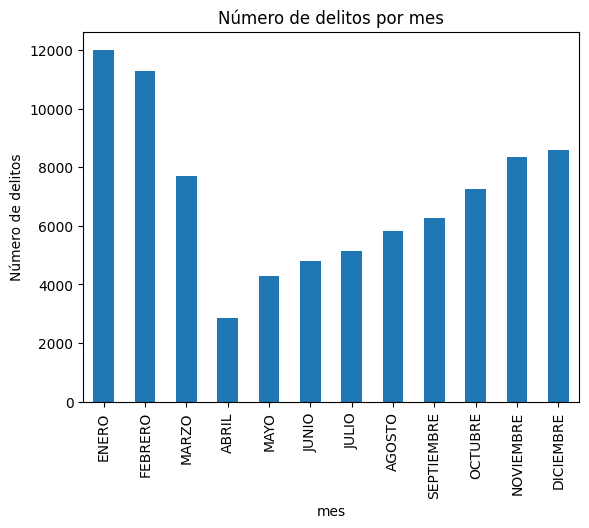

In [44]:
df.mes.value_counts().loc[meses].plot(kind='bar')
plt.title("Número de delitos por mes")
plt.ylabel("Número de delitos")

Text(0, 0.5, 'Número de delitos')

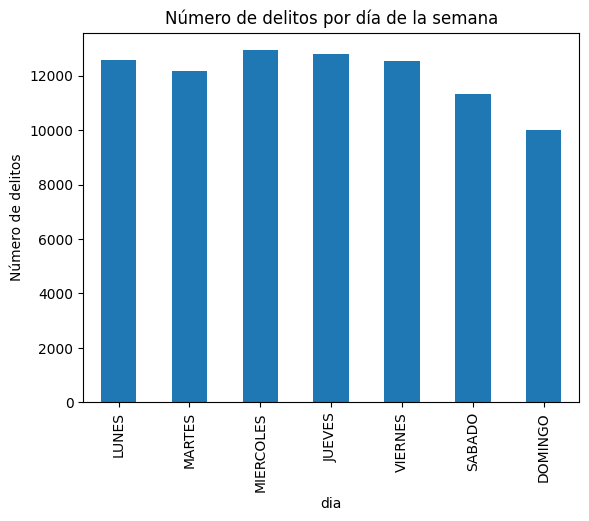

In [45]:
df.dia.value_counts().loc[dias].plot(kind='bar')
plt.title("Número de delitos por día de la semana")
plt.ylabel("Número de delitos")

Text(0, 0.5, 'Número de delitos')

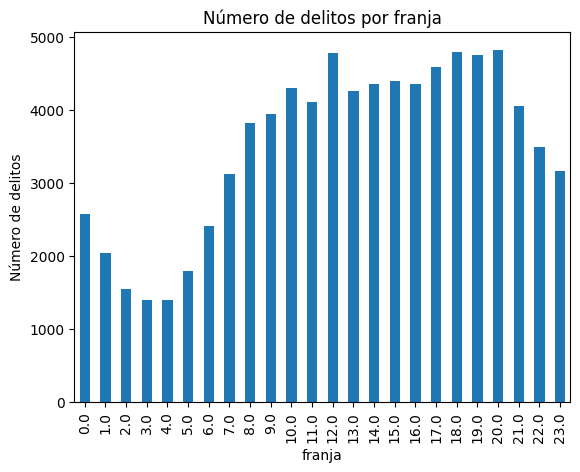

In [46]:
df.franja.value_counts().sort_index().plot(kind='bar')
plt.title("Número de delitos por franja")
plt.ylabel("Número de delitos")

Text(0, 0.5, 'Número de delitos')

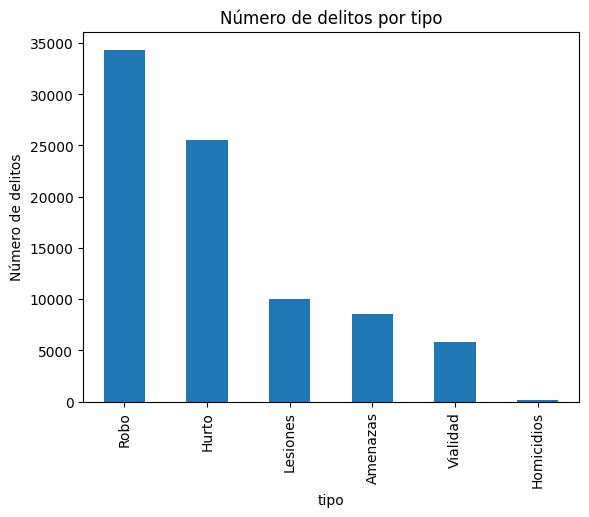

In [47]:
df.tipo.value_counts().plot(kind='bar')
plt.title("Número de delitos por tipo")
plt.ylabel("Número de delitos")

Text(0, 0.5, 'Número de delitos')

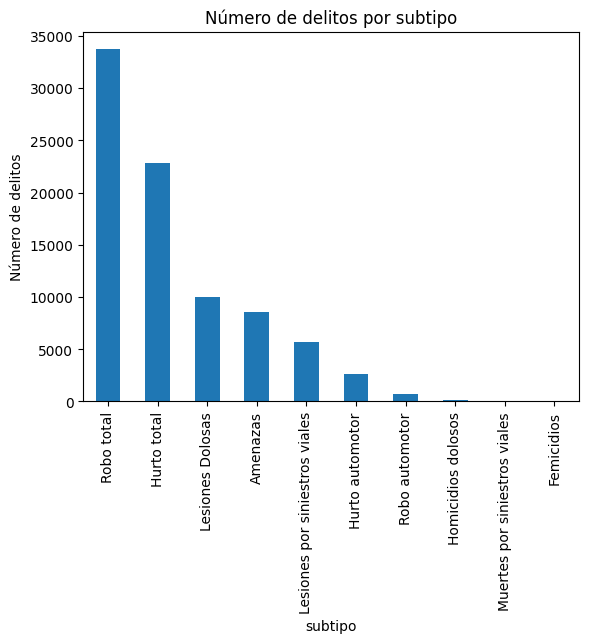

In [48]:
df.subtipo.value_counts().plot(kind='bar')
plt.title("Número de delitos por subtipo")
plt.ylabel("Número de delitos")

Text(0, 0.5, '')

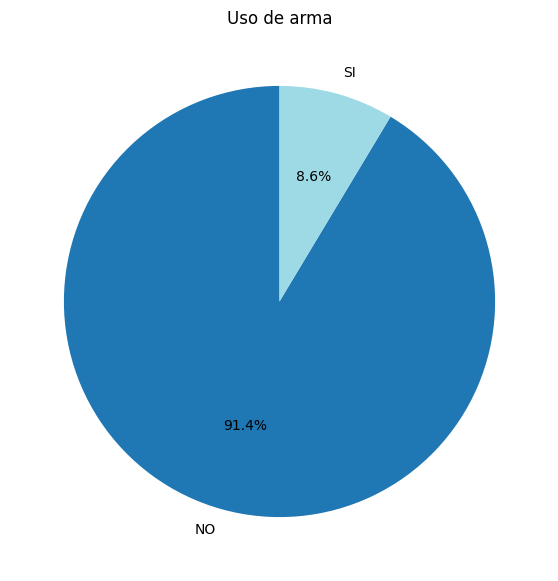

In [49]:
df.uso_arma.value_counts().plot(kind='pie',
                            autopct='%1.1f%%',  # Muestra los porcentajes
                            startangle=90,      # Girar el gráfico para mejor visualización
                            cmap='tab20',        # Cambiar colores
                            figsize=(7,7))
plt.title("Uso de arma")
plt.ylabel("")  


Text(0, 0.5, '')

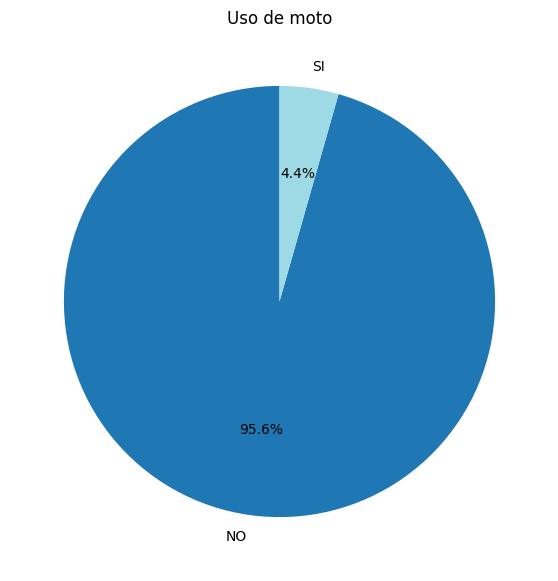

In [50]:
df.uso_moto.value_counts().plot(kind='pie',
                            autopct='%1.1f%%',  # Muestra los porcentajes
                            startangle=90,      # Girar el gráfico para mejor visualización
                            cmap='tab20',        # Cambiar colores
                            figsize=(7,7))
plt.title("Uso de moto")
plt.ylabel("") 


Text(0, 0.5, 'Número de delitos')

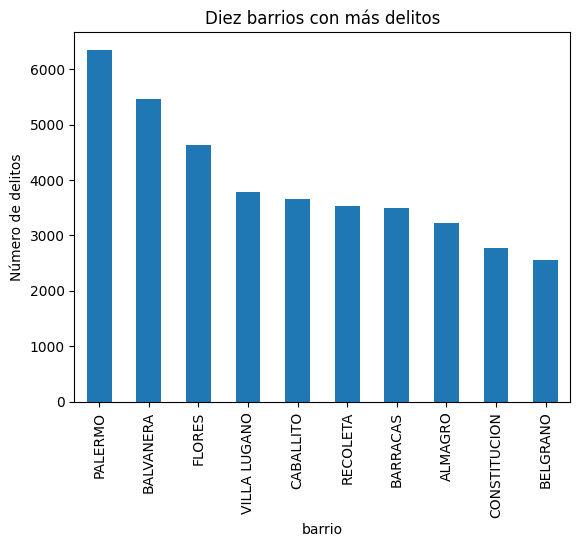

In [51]:
df.barrio.value_counts().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title("Diez barrios con más delitos")
plt.ylabel("Número de delitos")

Text(0, 0.5, 'Número de delitos')

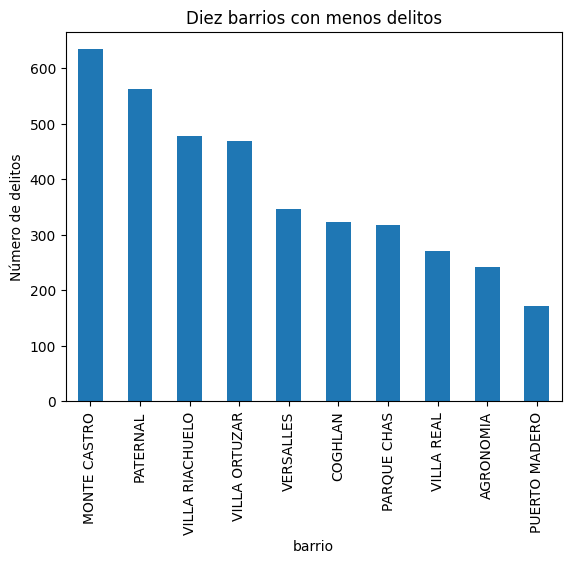

In [52]:
df.barrio.value_counts().sort_values(ascending=False)[-10:].plot(kind='bar')
plt.title("Diez barrios con menos delitos")
plt.ylabel("Número de delitos")

Text(0, 0.5, 'Número de delitos por comuna')

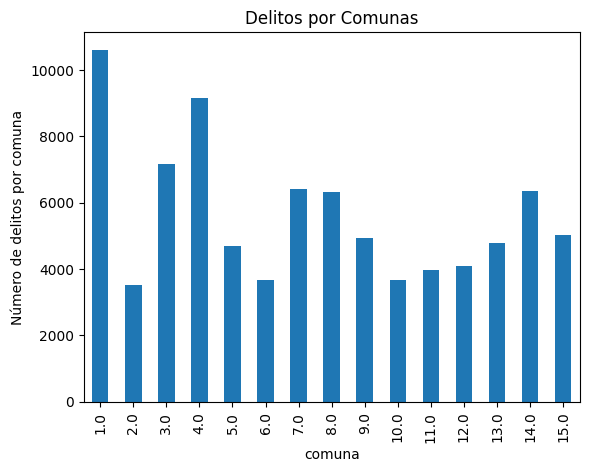

In [53]:
df.comuna.value_counts().sort_index().plot(kind='bar')
plt.title("Delitos por Comunas")
plt.ylabel("Número de delitos por comuna")

#### **Mapa de Calor de Delitos en ls ciudad de Buenos Aires**

In [54]:
import branca
import folium
from folium.plugins import HeatMap

# Crear mapa centrado en Buenos Aires
mapa = folium.Map(location=[-34.6037, -58.3816], zoom_start=11)

# Agregar capa de calor con las ubicaciones del delito
heat_data = df[['latitud', 'longitud', 'cantidad']].dropna().values
HeatMap(heat_data, radius=12).add_to(mapa)


mapa


ValueError: Location should consist of two numerical values, but '-34,641905' of type <class 'str'> is not convertible to float.

En el mapa podemos ver que las regiones más naranjas son los lugares donde se comenten más delitos, seguidas por las amarillas y luego por las verdes.

#### Barrios de cada comuna

In [ ]:
comuna_barrio = df.groupby('comuna')['barrio'].apply(lambda x: list(set(x))).reset_index()

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
comuna_barrio

,comuna,barrio
0,1.0,"[RETIRO, SAN TELMO, CONSTITUCION, SAN NICOLAS, PUERTO MADERO, MONSERRAT]"
1,2.0,[RECOLETA]
2,3.0,"[BALVANERA, SAN CRISTOBAL]"
3,4.0,"[PARQUE PATRICIOS, NUEVA POMPEYA, BOCA, BARRACAS]"
4,5.0,"[ALMAGRO, BOEDO]"
5,6.0,[CABALLITO]
6,7.0,"[FLORES, PARQUE CHACABUCO]"
7,8.0,"[VILLA LUGANO, VILLA SOLDATI, VILLA RIACHUELO]"
8,9.0,"[PARQUE AVELLANEDA, MATADEROS, LINIERS]"
9,10.0,"[VERSALLES, MONTE CASTRO, FLORESTA, VELEZ SARSFIELD, VILLA REAL, VILLA LURO]"


#### Sutipos de cada tipo de delito

In [ ]:
tipo_subtipo = df.groupby('tipo')['subtipo'].apply(lambda x: list(set(x))).reset_index()

In [ ]:
tipo_subtipo

,tipo,subtipo
0,Amenazas,[Amenazas]
1,Homicidios,"[Femicidios, Homicidios dolosos]"
2,Hurto,"[Hurto automotor, Hurto total]"
3,Lesiones,[Lesiones Dolosas]
4,Robo,"[Robo automotor, Robo total]"
5,Vialidad,"[Lesiones por siniestros viales, Muertes por siniestros viales]"


#### **Detección de Outliers en la Cantidad de Delitos por Barrio**

<Axes: >

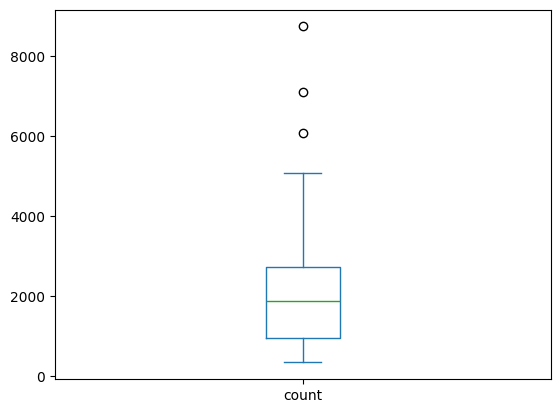

In [ ]:
df.barrio.value_counts().plot(kind='box')

Podemos ver en el gráfico que si hay outliers.

#### **Detección de Outliers en la Cantidad de Delitos por Comuna**

<Axes: >

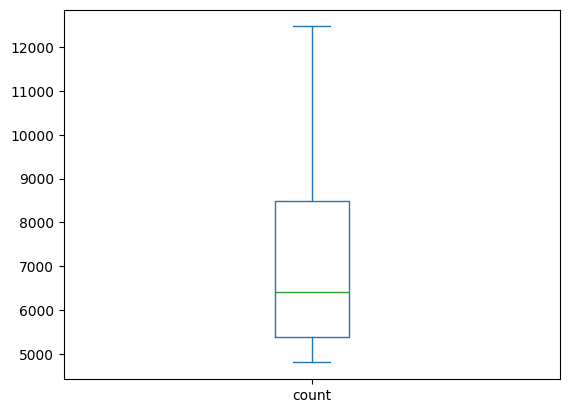

In [ ]:
df.comuna.value_counts().plot(kind='box')

In [ ]:
df.columns

Index(['id-mapa', 'anio', 'mes', 'dia', 'fecha', 'franja', 'tipo', 'subtipo',
       'uso_arma', 'uso_moto', 'barrio', 'comuna', 'latitud', 'longitud',
       'cantidad'],
      dtype='object')

En este caso los datos están distribuidos de manera más uniforme

#### **Tabulación cruzada**

In [ ]:
df_tipo_mes = pd.crosstab(df["tipo"], df["mes"])[meses]
df_tipo_mes


mes,ENERO,FEBRERO,MARZO,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE
tipo,,,,,,,,,,,,
Amenazas,927,882,1043,809,756,766,770,818,848,882,922,940
Homicidios,16,10,3,11,6,3,14,1,6,9,12,11
Hurto,2699,2625,3067,2463,2317,2602,2886,3064,3119,3267,3605,3718
Lesiones,1008,851,987,765,644,712,820,870,925,1059,1066,1124
Robo,3840,3630,4010,3324,3145,3272,3596,3631,3584,3834,4049,3950
Vialidad,499,431,650,560,277,637,656,714,631,792,633,809


In [ ]:
df_tipo_dia = (pd.crosstab(df["dia"], df["tipo"])).loc[dias]
df_tipo_dia

tipo,Amenazas,Homicidios,Hurto,Lesiones,Robo,Vialidad
dia,,,,,,
LUNES,1648,15,5324,1607,6560,1030
MARTES,1471,17,5319,1371,6713,1046
MIERCOLES,1585,10,5486,1478,6511,1129
JUEVES,1564,18,5422,1420,6486,1198
VIERNES,1543,8,5482,1593,6699,1350
SABADO,1368,12,4655,1647,5715,866
DOMINGO,1184,22,3744,1715,5181,670


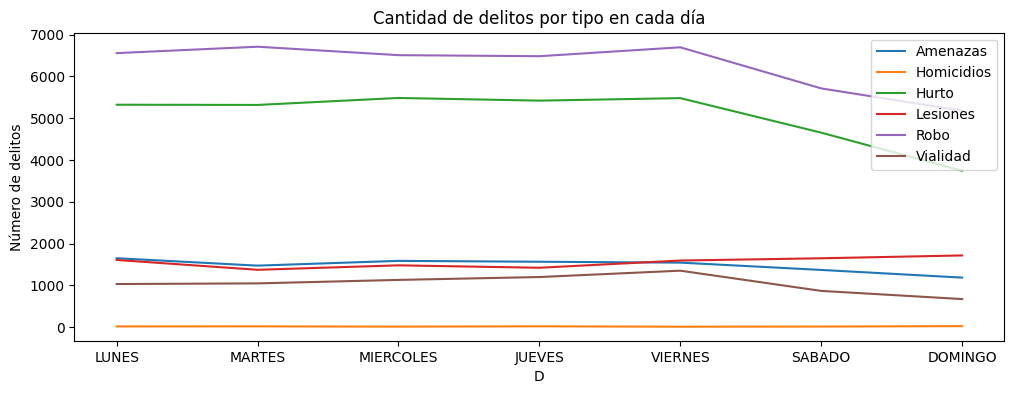

In [ ]:
plt.figure(figsize=(12, 4))
for tipo in df_tipo_dia.columns:
    plt.plot(df_tipo_dia.index, df_tipo_dia[tipo], label=tipo)
plt.xlabel('D')  # Eje X: Meses
plt.ylabel('Número de delitos')  # Eje Y: Número de delitos
plt.title('Cantidad de delitos por tipo en cada día')
plt.legend(loc='upper right')

Podemos observar que los delitos como robo, hurto y vialidad reducen el sábado y domingo, mientras que lesiones, amenazas y homicidios se mantienen estables a lo largo de la semana.

In [ ]:
df_comuna_mes = pd.crosstab(df["comuna"], df["mes"])[meses]
df_comuna_mes


mes,ENERO,FEBRERO,MARZO,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE
comuna,,,,,,,,,,,,
1.0,982,922,1067,875,838,910,990,1071,1035,1136,1399,1252
2.0,400,407,464,400,334,376,413,422,401,486,472,502
3.0,757,694,804,646,616,659,748,727,799,837,901,945
4.0,988,893,954,832,741,811,822,889,906,979,986,968
5.0,495,460,500,405,422,462,487,478,474,568,564,571
6.0,414,348,420,354,321,369,426,438,374,435,471,430
7.0,675,681,746,582,578,632,689,657,704,757,744,812
8.0,687,599,720,642,532,595,661,734,710,737,716,749
9.0,531,487,596,520,416,474,469,579,529,610,591,657


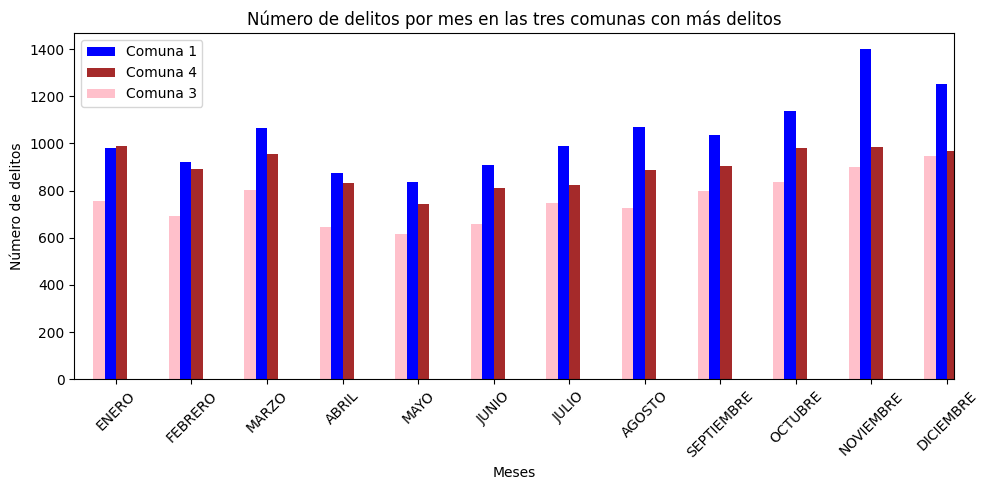

In [ ]:
plt.figure(figsize=(10, 5))  

# Graficar 
df_comuna_mes.iloc[0].plot(kind='bar', position=1, width=0.15, label='Comuna 1', color='blue')

df_comuna_mes.iloc[3].plot(kind='bar', position=0, width=0.15, label='Comuna 4', color='brown')

df_comuna_mes.iloc[2].plot(kind='bar', position=2, width=0.15, label='Comuna 3', color='pink')

plt.xlabel('Meses')  
plt.ylabel('Número de delitos')  
plt.title('Número de delitos por mes en las tres comunas con más delitos') 
plt.legend()  

plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

En el gráfico podemos observar como en noviembre aumentan los delitos en la Comuna 1 en comparación con octubre, mientras en las comunas 3 y 4 no aumentan tanto.

In [ ]:
df.uso_arma.value_counts()

uso_arma
NO    99544
SI     8338
Name: count, dtype: int64

In [ ]:
df[df['uso_arma'] == "SI"].tipo.value_counts()

tipo
Robo    8338
Name: count, dtype: int64

In [ ]:
df[df['uso_arma'] == "SI"].subtipo.value_counts()

subtipo
Robo total        7769
Robo automotor     569
Name: count, dtype: int64

Podemos observar que las armas se usan para el tipo de delito robos y los subtipos Robo total y Robo automotor.

In [ ]:
df[df['uso_moto'] == "SI"].tipo.value_counts()

tipo
Robo    4533
Name: count, dtype: int64

In [ ]:
df[df['uso_moto'] == "SI"].subtipo.value_counts()

subtipo
Robo total    4533
Name: count, dtype: int64

Podemos observar que las motos se usan para el tipo de delito Robo, y el subtipo Robo Total.

In [ ]:
df.tipo.value_counts()

tipo
Robo          43865
Hurto         35432
Lesiones      10831
Amenazas      10363
Vialidad       7289
Homicidios      102
Name: count, dtype: int64

In [ ]:
df_tipo_franja = pd.crosstab(df["tipo"], df["franja"])
df_tipo_franja


franja,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
tipo,,,,,,,,,,,,,,,,,,,,,
Amenazas,1268,207,159,137,81,74,89,133,214,310,...,539,557,557,617,698,610,624,566,458,351
Homicidios,1,6,3,4,3,9,2,3,3,2,...,5,3,5,3,3,4,5,2,10,12
Hurto,1144,616,498,431,389,558,1034,1731,2344,2135,...,1860,1715,1789,1920,1985,1799,1505,1150,1118,1152
Lesiones,555,415,339,328,285,250,273,245,304,299,...,551,523,554,615,642,638,601,566,523,491
Robo,1308,890,818,771,776,1113,1496,2028,2132,1830,...,2058,2092,2139,2363,2672,2989,2981,2362,1906,1670
Vialidad,194,104,81,48,49,74,125,199,318,345,...,500,479,571,549,469,401,329,303,224,184


Text(0, 0.5, 'Número de delitos')

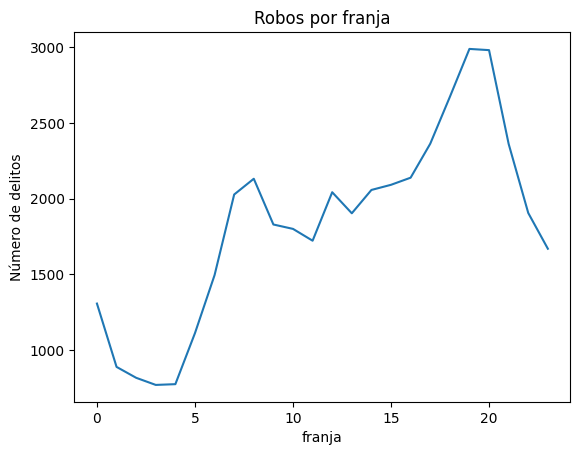

In [ ]:
df_tipo_franja.loc['Robo'].plot()
plt.title("Robos por franja")
plt.ylabel("Número de delitos")

Podemos observar que el delito más cometido, el robo, se produce más en las noches, siendo las 20 horas la hora en que más casos se dan.

Text(0, 0.5, 'Número de delitos')

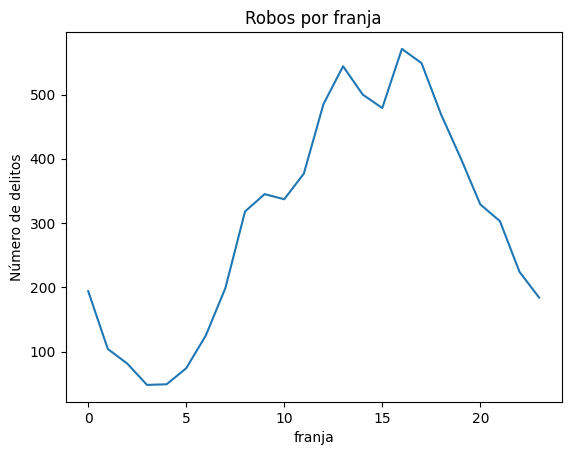

In [ ]:
df_tipo_franja.loc['Vialidad'].plot()
plt.title("Robos por franja")
plt.ylabel("Número de delitos")

Podemos observar que los delitos relacionados con la vialidad tienen su pico a partir de las 12 horas hasta las 17 horas.